# Data Exploration

Here I'll have a look at the data

## Imports

In [1]:
import pandas as pd
import numpy as np 

## Data

In [2]:
def read_in_data(path_bitcoin_df = '../data/raw/1_training_data_sets/1_bitcoin_price_data_set.csv',
                path_training_df = '../data/raw/1_training_data_sets/1_training_data.csv'):
    df_bitcoin = pd.read_csv('../data/raw/1_training_data_sets/1_bitcoin_price_data_set.csv', 
                            encoding = "ISO-8859-1")
    df = pd.read_csv('../data/raw/1_training_data_sets/1_training_data.csv',
                             encoding = "ISO-8859-1")
    return df_bitcoin, df

In [3]:
df_bitcoin = pd.read_csv('../data/raw/1_training_data_sets/1_bitcoin_price_data_set.csv', 
                        encoding = "ISO-8859-1")
df = pd.read_csv('../data/raw/1_training_data_sets/1_training_data.csv',
                         encoding = "ISO-8859-1")

In [4]:
df_bitcoin.head()

,date_in_ms;price
0,1367107200000;135.3
1,1367193600000;141.96
2,1367280000000;135.3
3,1367366400000;117.0
4,1367452800000;103.43


In [5]:
df.head()

,OBS_ID,ï..id,symbol,name,categories_0,contract_address,transaction_count,holder_count,timestamp,country_origin,...,KW31,KW32,KW33,KW34,KW35,KW36,KW37,KW38,KW39,success
0,235691,01coin,zoc,01coin,Masternodes,NaN,NaN,NaN,Sep-26-2019 15:59:01 PM,NaN,...,0.002447546274714919,0.002808322880574077,0.0021200694938956423,0.001355550652369834,0.002012671604248252,0.0023568770184417566,0.0025350649298760968,0.0021662825358147323,0.001778674696301052,0
1,235692,0x,zrx,0x,Protocol,0xe41d2489571d322189246dafa5ebde1f4699f498,975773.0,109840.0,Sep-26-2019 01:56:58 PM,US,...,0.21931512365670175,0.1902118244838738,0.1739528088194773,0.1768360401100923,0.1534983327381213,0.15961035385705513,0.16061107287163193,0.22629107696617964,0.21794407055321546,1
2,235693,0xcert,zxc,0xcert,Protocol,0x83e2be8d114f9661221384b3a50d24b96a5653f5,22730.0,13914.0,Sep-25-2019 11:58:48 PM,SI,...,0.0015627075063726896,0.0009794145108587154,0.0009140279072363044,0.001081632723442786,0.0009823537645584207,0.0009866124861903753,0.0006878811046944512,0.0009500823096029532,0.0007445952388706128,0
3,235694,0xdark,oxd,0xDark,NaN,0xe1ae07ea12bdae73b7f546075f5c78f65aad4876,125.0,51.0,Sep-26-2019 04:58:35 AM,NaN,...,0,0,0,0,0,0,0,0,0.04619907404199976,0
4,235695,10m-token,10mt,10M Token,NaN,0xe701cd3329057aea9d54300ddd05e41b8d74727a,16417.0,6250.0,Sep-25-2019 11:14:11 PM,NaN,...,0.0008870106032193045,0.0008870106032193045,0.0008870106032193045,0.0008870106032193045,0.0008870106032193045,0.0008870106032193045,0.0008870106032193045,0.0008870106032193045,0.0008870106032193045,0


In [6]:
df.dtypes

OBS_ID           int64
ï..id           object
symbol          object
name            object
categories_0    object
                 ...  
KW36            object
KW37            object
KW38            object
KW39            object
success          int64
Length: 91, dtype: object

## Columns

Have a look at interesting columns

### categories_0 

- Assigned category

In [12]:
df.categories_0.unique()

array(['Masternodes', 'Protocol', nan, 'Cryptocurrency',
       'Business Services', 'Sports', 'Infrastructure', 'Gambling',
       'Artificial Intelligence', 'Smart Contract Platform', 'Media',
       'Exchange-based Tokens', 'Decentralized Exchange', 'Education',
       'Finance / Banking', 'Entertainment', 'Real Estate', 'Other',
       'Tourism', 'Communication', 'Technology & Science',
       'Business Platform', 'Healthcare', 'Retail', 'Charity', 'Legal',
       'Manufacturing', 'Investment', 'Software', 'Privacy Coins',
       'Big Data', 'Virtual Reality', 'Asset-backed Tokens',
       'Stablecoins', 'Internet of Things (IOT)', 'Energy', 'Storage',
       'Augmented Reality', 'Index', 'Music'], dtype=object)

In [15]:
df.categories_0.value_counts()

Cryptocurrency              503
Masternodes                 178
Finance / Banking           175
Business Services           149
Business Platform           130
Exchange-based Tokens        95
Entertainment                84
Smart Contract Platform      62
Infrastructure               54
Decentralized Exchange       51
Software                     50
Gambling                     50
Technology & Science         46
Media                        40
Communication                37
Protocol                     36
Artificial Intelligence      35
Other                        34
Charity                      33
Internet of Things (IOT)     30
Privacy Coins                30
Big Data                     27
Education                    27
Energy                       26
Retail                       22
Healthcare                   22
Tourism                      22
Asset-backed Tokens          19
Real Estate                  18
Sports                       17
Stablecoins                  13
Legal   

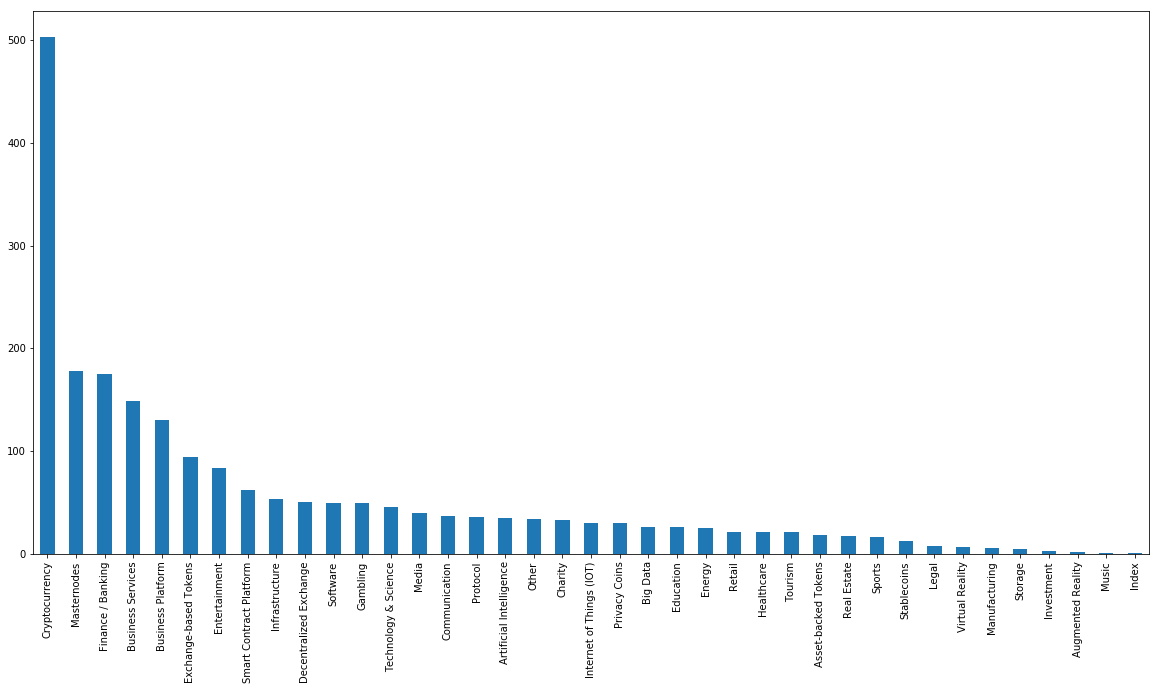

In [19]:
ax = df.categories_0.value_counts().plot(kind='bar', figsize=(20,10));

In [34]:
df.categories_0.isna().sum()

2609

### Contract Address

- Contract address of token in Etherum
- How is it possiblethat both have the same address


In [39]:
df.contract_address.unique()

array([nan, '0xe41d2489571d322189246dafa5ebde1f4699f498',
       '0x83e2be8d114f9661221384b3a50d24b96a5653f5', ...,
       '0xe7e4279b80d319ede2889855135a22021baf0907',
       '0xe8f9fa977ea585591d9f394681318c16552577fb',
       '0xc5e017450346e4f9a2e477519d65affcfc90586a'], dtype=object)

In [40]:
df.contract_address.nunique()

2519

In [43]:
df.contract_address.describe(include='all')

count                                           2524
unique                                          2519
top       0xa2a54f1ec1f09316ef12c1770d32ed8f21b1fb6a
freq                                               2
Name: contract_address, dtype: object

In [55]:
print("Number of Entries with same values: {}".format((df.contract_address.value_counts() > 1).sum()))

Number of Entries with same values: 5


In [56]:
print("Number of NA values: {}".format(df.contract_address.isna().sum()))

Number of NA values: 2233


In [76]:
a = (df.contract_address.value_counts() > 1)
a[a == True].index
df.contract_address

In [85]:
doubled_addresses = a[a == True].index.values

In [88]:
df[df.contract_address.isin(doubled_addresses)]

,OBS_ID,ï..id,symbol,name,categories_0,contract_address,transaction_count,holder_count,timestamp,country_origin,...,KW31,KW32,KW33,KW34,KW35,KW36,KW37,KW38,KW39,success
961,236652,coinzest,coz,CoinZest,Exchange-based Tokens,0x65c9f3bc25370cd91fd7a1badc7352cae2d8031b,1515.0,27.0,Sep-23-2019 07:04:23 AM,NaN,...,0.5064391757496708,0,0,0,0,0,0,0,"4,85111E+15",1
1027,236718,cozplus,cozp,COZPlus,NaN,0x65c9f3bc25370cd91fd7a1badc7352cae2d8031b,1515.0,27.0,Sep-23-2019 07:04:23 AM,NaN,...,0.6324278330053835,"2,18008E+15","2,14431E+15","1,83012E+13","1,65542E+16","1,41183E+16","1,46466E+15","1,38996E+16","1,63039E+15",0
1292,236983,digifinex-cash,dfc,DigiFinex Cash,NaN,0xa2a54f1ec1f09316ef12c1770d32ed8f21b1fb6a,2618.0,338.0,Sep-20-2019 02:47:35 AM,NaN,...,0.1459706234080462,0.1459706234080462,0.1459706234080462,0.1459706234080462,0.1459706234080462,0.1459706234080462,0.1459706234080462,0.1459706234080462,0.1459706234080462,0
1293,236984,digifinextoken,dft,DigiFinexToken,Exchange-based Tokens,0xa2a54f1ec1f09316ef12c1770d32ed8f21b1fb6a,2618.0,338.0,Sep-20-2019 02:47:35 AM,NaN,...,0.7147909811441694,0.7536583179536623,0.8348422318600947,0.833336732936572,0.7158061440778494,0.7749587344251649,0.8083643244899439,0.7928297295340895,0.7254206152258977,1
1679,237370,facecoin,fc,Facecoin,NaN,0xe6923E9b56Db1EeD1c9f430Ea761DA7565e260Fe,1620.0,486.0,Aug-23-2019 02:21:43 PM,NaN,...,0.005112398463339086,0.005112398463339086,0.005112398463339086,0.005112398463339086,0.005112398463339086,0.005112398463339086,0.005112398463339086,0,0.005112398463339086,0
1781,237472,fortknoxter,fkx,FortKnoxster,NaN,0x009e864923b49263c7f10d19b7f8ab7a9a5aad33,30805.0,15840.0,Sep-26-2019 05:55:35 AM,NaN,...,0,0,0,0.003989549198812369,0.0037720322043936026,0.004136553419489411,0.004182852582967571,0.004673534298106825,0,0
2444,238135,knoxstertoken,fkx,Knoxstertoken,NaN,0x009e864923b49263c7f10d19b7f8ab7a9a5aad33,30805.0,15840.0,Sep-26-2019 05:55:35 AM,NaN,...,0.005510654993551271,0.005681391321757839,0.005221455355112845,0.004047988498098646,0.0037077623965838984,0.004278864338971083,0.005024055075506911,0.004756524461201943,0.003199209805359998,0
2660,238351,magnetcoin,magn,Magnetcoin,NaN,0xe6923E9b56Db1EeD1c9f430Ea761DA7565e260Fe,1620.0,486.0,Aug-23-2019 02:21:43 PM,NaN,...,0.015207534587443684,0.015207534587443684,0.015207534587443684,0.015207534587443684,0.015207534587443684,0.015207534587443684,0.015207534587443684,0.015207534587443684,0.015207534587443684,0
4545,240236,winchain,win,Winchain,NaN,0xbfaa8cf522136c6fafc1d53fe4b85b4603c765b8,2134.0,510.0,Sep-23-2019 04:46:59 AM,NaN,...,0,0,0,0,0,0.00148396408900038,0.002012403394951025,0.0016182837095348476,0.001607635565267927,1
4551,240242,wintoken,win,WinToken,NaN,0xbfaa8cf522136c6fafc1d53fe4b85b4603c765b8,2134.0,510.0,Sep-23-2019 04:46:59 AM,NaN,...,0.0006291781892150673,0.0006188141871861109,0.0007429463751295791,0.0011302965689789614,0.001162699983251661,0.0014885798201239417,0.002024334299458688,0.0016209637870209608,0.00161273067687043,0


### Transaction Count

- Is NA zero or not known?
- Outlier Handline needed

In [91]:
print("Number of NA values: {}".format(df.transaction_count.isna().sum()))

Number of NA values: 2233


In [92]:
df.transaction_count.describe()

count    2.524000e+03
mean     4.577472e+04
std      2.611421e+05
min      0.000000e+00
25%      1.499500e+03
50%      8.277000e+03
75%      3.065275e+04
max      8.945280e+06
Name: transaction_count, dtype: float64

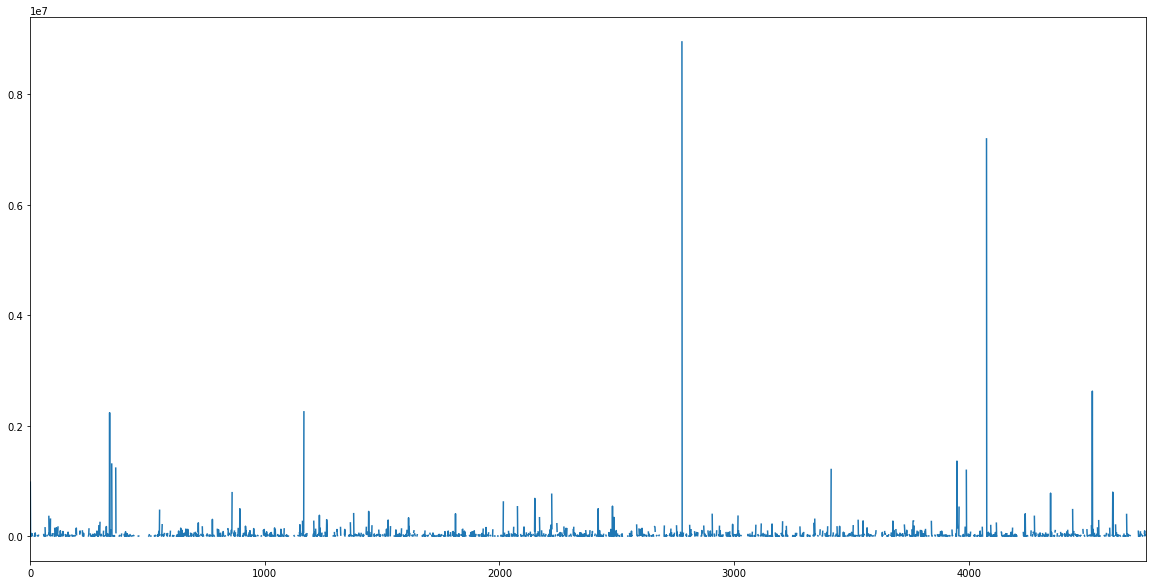

In [95]:
df.transaction_count.plot(kind="line", figsize=(20,10))

In [98]:
import seaborn as sns

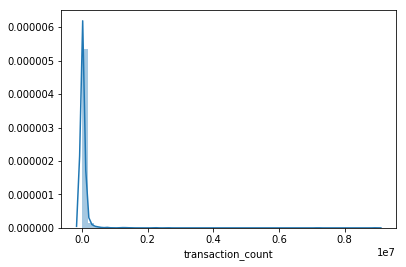

In [102]:
sns.distplot(df.transaction_count[~df.transaction_count.isna()])

### Timestamp

- Very powerful feature
- Can extract a lot of different features from that
- What to do with NA values?
- Remove outliers

In [104]:
df.timestamp.dtype

dtype('O')

In [106]:
from datetime import datetime

In [107]:
df.timestamp[0]

'Sep-26-2019 15:59:01 PM'

In [112]:
datetime_object = datetime.strptime('Sep-26-2019 15:59:01 PM', '%b-%d-%Y %H:%M:%S %p')

In [113]:
datetime_object

datetime.datetime(2019, 9, 26, 15, 59, 1)

In [153]:
df.timestamp.isna().sum()

1908

In [155]:
df = df[~df.timestamp.isna()]

In [156]:
df = df.assign(timestamp_datetime = df.apply(lambda x:
                                            datetime.strptime(x.timestamp, '%b-%d-%Y %H:%M:%S %p'),
                                            axis=1))

In [180]:
df.iloc[0].timestamp_datetime.month

9

In [158]:
df = df.assign(hour = df.apply(lambda x: x.timestamp_datetime.hour, axis=1))

In [159]:
df = df.assign(minute = df.apply(lambda x: x.timestamp_datetime.minute, axis=1))

In [160]:
df = df.assign(second = df.apply(lambda x: x.timestamp_datetime.second, axis=1))

In [161]:
df = df.assign(month = df.apply(lambda x: x.timestamp_datetime.month, axis=1))

In [162]:
df = df.assign(day = df.apply(lambda x: x.timestamp_datetime.day, axis=1))

In [167]:
df = df.assign(year = df.apply(lambda x: x.timestamp_datetime.year, axis=1))

In [168]:
df.year.unique()

array([2019, 2018, 2017, 1970])

In [169]:
df.year.value_counts()

2019    2812
2018      32
2017       3
1970       2
Name: year, dtype: int64

In [185]:
df = df[df.year != 1970]
df = df[df.year != 2017]

In [172]:
df.shape

(2847, 98)

In [163]:
df.head()

,OBS_ID,ï..id,symbol,name,categories_0,contract_address,transaction_count,holder_count,timestamp,country_origin,...,KW37,KW38,KW39,success,timestamp_datetime,hour,minute,second,month,day
0,235691,01coin,zoc,01coin,Masternodes,NaN,NaN,NaN,Sep-26-2019 15:59:01 PM,NaN,...,0.0025350649298760968,0.0021662825358147323,0.001778674696301052,0,2019-09-26 15:59:01,15,59,1,9,26
1,235692,0x,zrx,0x,Protocol,0xe41d2489571d322189246dafa5ebde1f4699f498,975773.0,109840.0,Sep-26-2019 01:56:58 PM,US,...,0.16061107287163193,0.22629107696617964,0.21794407055321546,1,2019-09-26 01:56:58,1,56,58,9,26
2,235693,0xcert,zxc,0xcert,Protocol,0x83e2be8d114f9661221384b3a50d24b96a5653f5,22730.0,13914.0,Sep-25-2019 11:58:48 PM,SI,...,0.0006878811046944512,0.0009500823096029532,0.0007445952388706128,0,2019-09-25 11:58:48,11,58,48,9,25
3,235694,0xdark,oxd,0xDark,NaN,0xe1ae07ea12bdae73b7f546075f5c78f65aad4876,125.0,51.0,Sep-26-2019 04:58:35 AM,NaN,...,0,0,0.04619907404199976,0,2019-09-26 04:58:35,4,58,35,9,26
4,235695,10m-token,10mt,10M Token,NaN,0xe701cd3329057aea9d54300ddd05e41b8d74727a,16417.0,6250.0,Sep-25-2019 11:14:11 PM,NaN,...,0.0008870106032193045,0.0008870106032193045,0.0008870106032193045,0,2019-09-25 11:14:11,11,14,11,9,25


In [189]:
resampled_data = df.set_index('timestamp_datetime').resample('M').count()['OBS_ID']

In [191]:
resampled_data

timestamp_datetime
2018-01-31       1
2018-02-28       1
2018-03-31       1
2018-04-30       2
2018-05-31       1
2018-06-30       5
2018-07-31       1
2018-08-31       5
2018-09-30       3
2018-10-31       2
2018-11-30       2
2018-12-31       8
2019-01-31       6
2019-02-28      14
2019-03-31      12
2019-04-30      20
2019-05-31      25
2019-06-30      26
2019-07-31      65
2019-08-31     192
2019-09-30    2452
Freq: M, Name: OBS_ID, dtype: int64

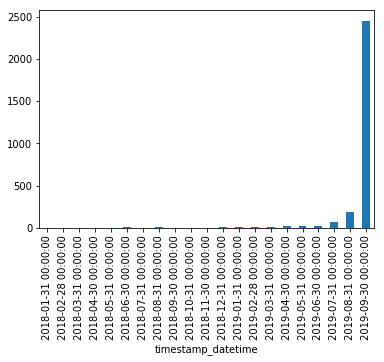

In [194]:
resampled_data.plot(kind="bar")

### Holder Count

In [196]:
df_bitcoin, df = read_in_data()

In [199]:
df.holder_count.describe()

count      2520.000000
mean      11394.625397
std       33692.705165
min           0.000000
25%         363.000000
50%        2165.500000
75%        8666.500000
max      746672.000000
Name: holder_count, dtype: float64

In [200]:
print("NA values: {}".format(df.holder_count.isna().sum()))

NA values: 2237


In [201]:
df = df[~df.holder_count.isna()]

In [202]:
print("NA values: {}".format(df.holder_count.isna().sum()))

NA values: 0


### Label

In [204]:
df_bitcoin, df = read_in_data()

In [208]:
df_grouped = df.groupby(df.success).count()['OBS_ID']

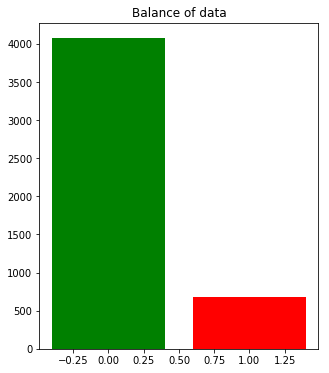

In [217]:
fig, ax = plt.subplots(figsize=(5,6))

ax.bar(df_grouped.index, df_grouped.values, color=['green', 'red']);
ax.set_title("Balance of data");


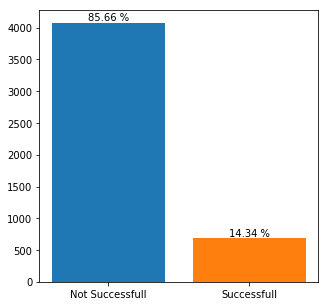

In [219]:
x = df.success.unique()
x = ['Not Successfull', 'Successfull']
y = df.groupby(df.success).count()["OBS_ID"]

fig, ax = plt.subplots(figsize=(5,5))

ax.bar(x, y, color=['tab:blue', 'tab:orange']);
ax.set_xticks(range(0,2));
ax.set_xticklabels(x);

rects = ax.patches

# Make some labels.
labels = [(y[0] / y.sum() * 100), (y[1] / y.sum() * 100)]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, "{:.2f} %".format(label),
            ha='center', va='bottom')